In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  


In [ ]:
# Ver las columnas del DataFrame
print(df.columns)


In [3]:
# Tabla cruzada entre 'category' y 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Mostrar la tabla cruzada
print(crosstab)


isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [5]:
print(crosstab.columns)


Index([False, True], dtype='bool', name='isBestSeller')


In [15]:
# Calcular la proporción de "mejor vendidos" para cada categoría
crosstab['proportion_best_seller'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Ordenar las categorías por la proporción de "mejor vendidos" en orden descendente
sorted_crosstab = crosstab.sort_values(by='proportion_best_seller', ascending=False)

# Mostrar las categorías ordenadas
print(sorted_crosstab)


isBestSeller                      False  True  proportion_best_seller
category                                                             
Grocery                            9008   556                0.058135
Smart Home Security & Lighting       98     6                0.057692
Health & Personal Care             9017   552                0.057686
Mobile Phone Accessories            248    11                0.042471
Power & Hand Tools                 8353   306                0.035339
...                                 ...   ...                     ...
CD, Disc & Tape Players            8798     0                0.000000
General Music-Making Accessories    259     0                0.000000
Snowboard Boots                    1449     0                0.000000
Boxes & Organisers                  911     0                0.000000
eBook Readers & Accessories         246     0                0.000000

[296 rows x 3 columns]


In [17]:
import scipy.stats as stats
import numpy as np

# Realizar el test de Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(crosstab.iloc[:, :2])  # Excluye la columna 'proportion_best_seller'

print("Resultados del Test de Chi-cuadrado:")
print(f"Chi-cuadrado: {chi2:.2f}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p:.4f}")

# Interpretar el resultado
if p < 0.05:
    print("Hay una relación significativa entre la categoría y el estatus de mejor vendido (se rechaza la hipótesis nula).")
else:
    print("No hay evidencia suficiente para afirmar que existe una relación significativa (no se rechaza la hipótesis nula).")


Resultados del Test de Chi-cuadrado:
Chi-cuadrado: 36540.20
Grados de libertad: 295
Valor p: 0.0000
Hay una relación significativa entre la categoría y el estatus de mejor vendido (se rechaza la hipótesis nula).


In [19]:
# Calcular Cramér's V
n = crosstab.values.sum()  # Número total de observaciones
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

print("\nCoeficiente de Cramér's V:")
print(f"Cramér's V: {cramers_v:.4f}")

# Interpretación básica
if cramers_v < 0.1:
    print("Asociación débil.")
elif cramers_v < 0.3:
    print("Asociación moderada.")
else:
    print("Asociación fuerte.")



Coeficiente de Cramér's V:
Cramér's V: 0.0865
Asociación débil.


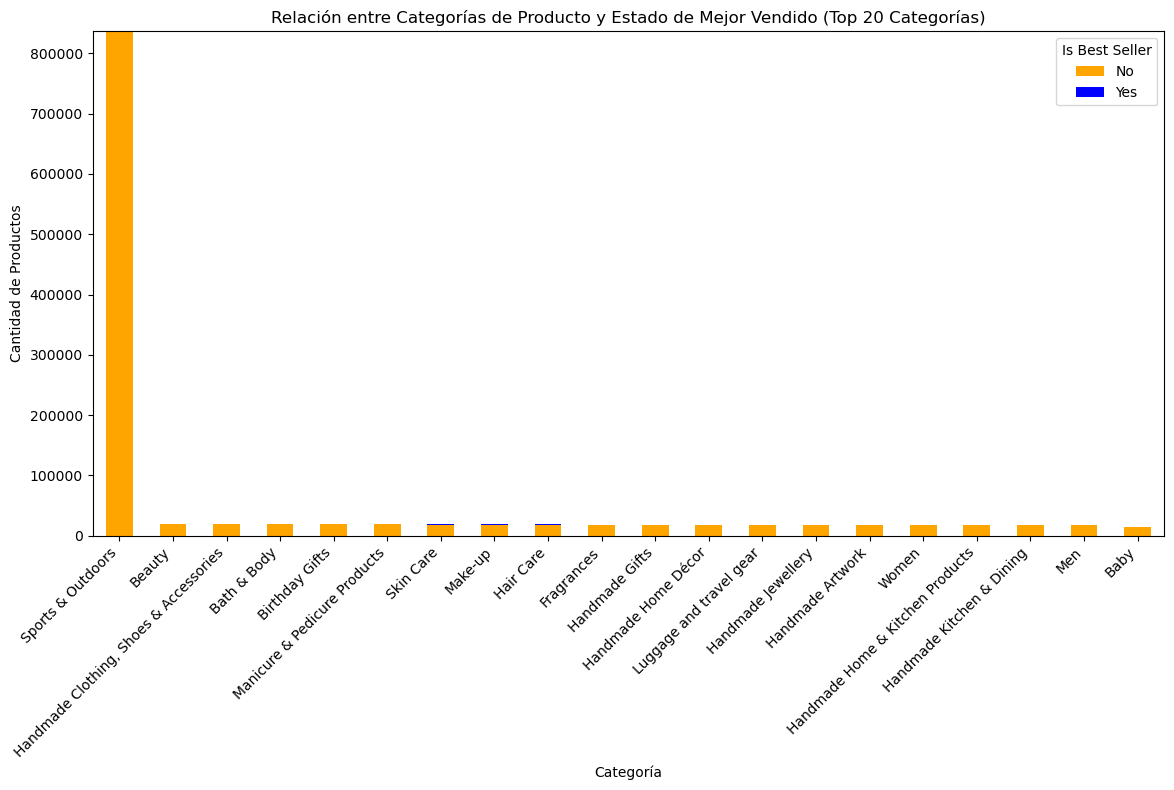

In [30]:
import matplotlib.pyplot as plt

# Filtrar las 20 categorías principales según la cantidad de productos
top_categories = df['category'].value_counts().head(20).index
filtered_crosstab = crosstab.loc[top_categories]

# Crear un gráfico de barras apiladas para visualizar la relación en las principales categorías
filtered_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), color=['orange', 'blue'])
plt.title('Relación entre Categorías de Producto y Estado de Mejor Vendido (Top 20 Categorías)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Productos')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Is Best Seller', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


In [23]:
# Calcular el rango intercuartílico (IQR) para la columna 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar valores atípicos
df_without_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Datos antes de eliminar valores atípicos: {len(df)}")
print(f"Datos después de eliminar valores atípicos: {len(df_without_outliers)}")



Datos antes de eliminar valores atípicos: 2443651
Datos después de eliminar valores atípicos: 2115963


/var/folders/3l/5vpts1f550q_tbzn2j995rlh0000gn/T/ipykernel_6538/107681127.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df_top_categories, x='category', y='price', inner='box', scale='width')


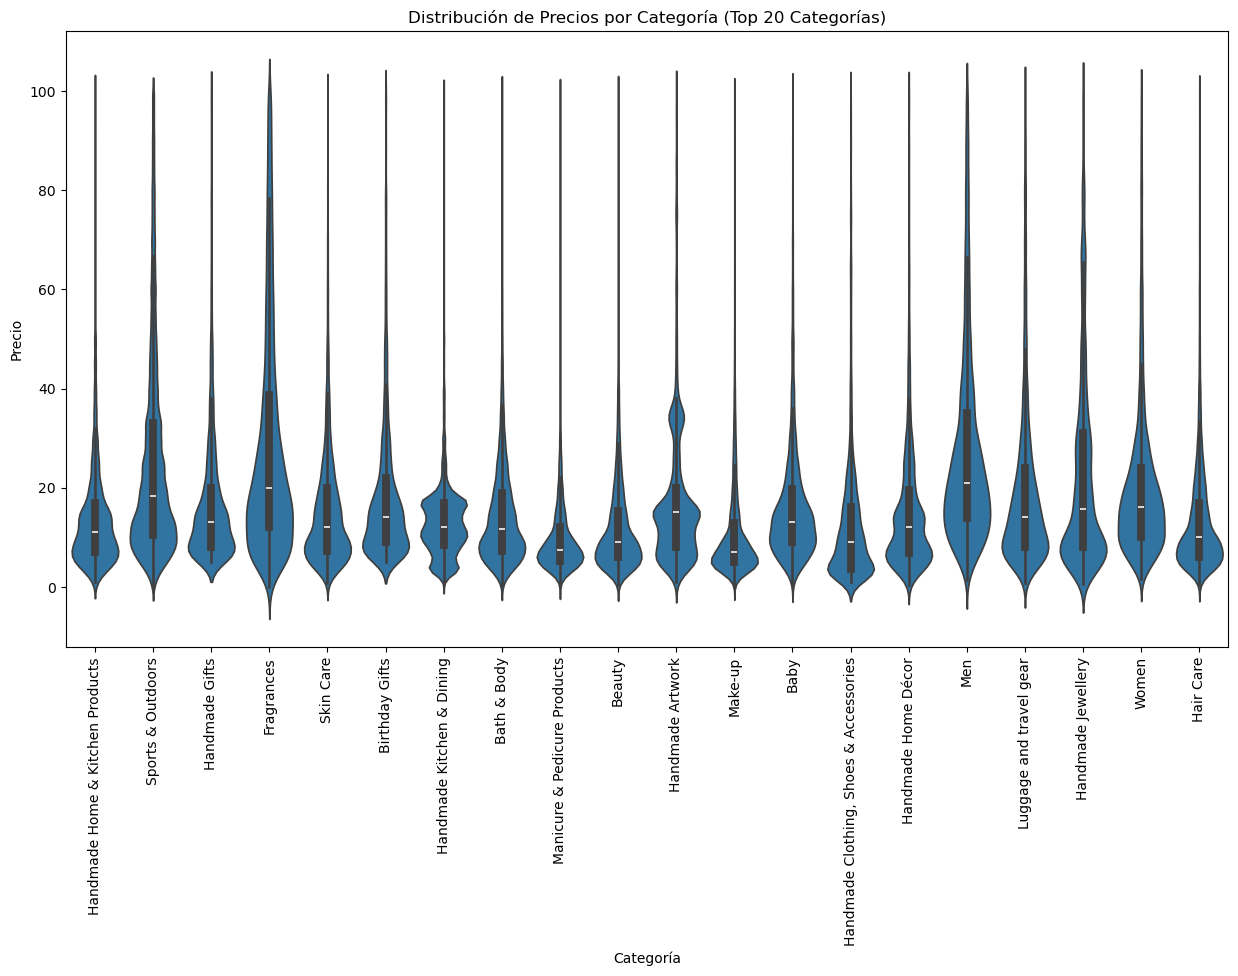

La categoría con el precio mediano más alto es: Desktop PCs con un precio mediano de 74.00


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las 20 categorías principales según la cantidad de productos
top_20_categories = df_without_outliers['category'].value_counts().head(20).index
df_top_categories = df_without_outliers[df_without_outliers['category'].isin(top_20_categories)]

# Crear un violin plot para visualizar la distribución del precio
plt.figure(figsize=(15, 8))
sns.violinplot(data=df_top_categories, x='category', y='price', inner='box', scale='width')
plt.title('Distribución de Precios por Categoría (Top 20 Categorías)')
plt.xticks(rotation=90)
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.show()

# Calcular la categoría con el precio mediano más alto en todo el conjunto de datos (sin filtrar)
median_prices = df_without_outliers.groupby('category')['price'].median().sort_values(ascending=False)
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"La categoría con el precio mediano más alto es: {highest_median_category} con un precio mediano de {highest_median_price:.2f}")


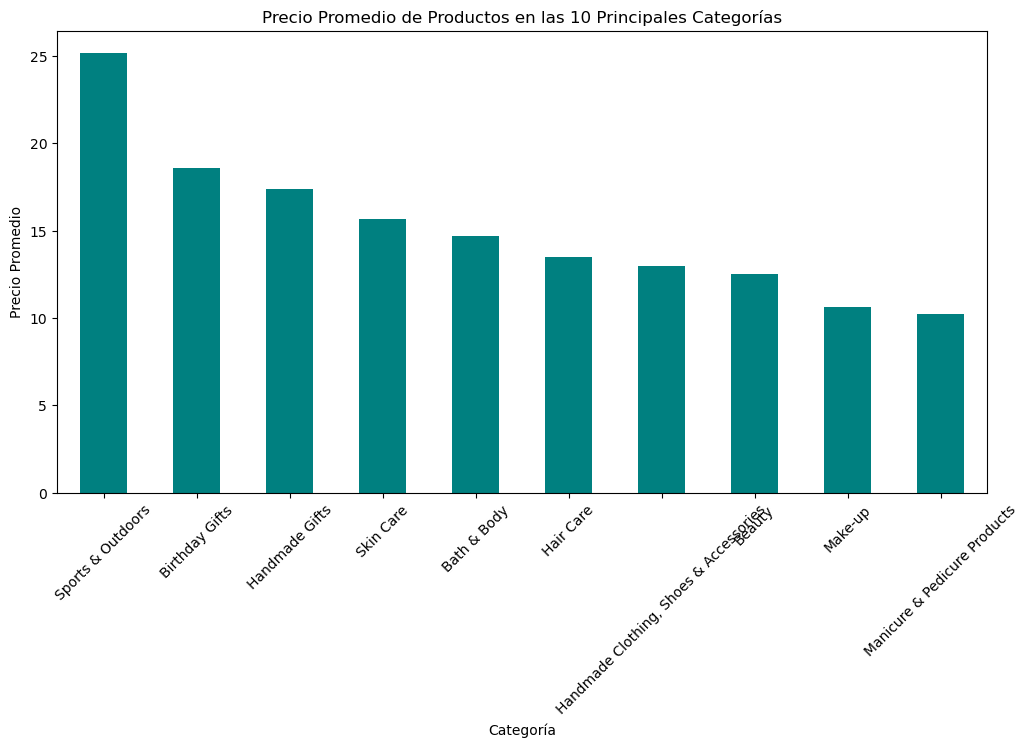

La categoría con el precio promedio más alto es: Motherboards con un precio promedio de 68.77


In [27]:
import matplotlib.pyplot as plt

# Calcular el promedio de precio por categoría
average_prices = df_without_outliers.groupby('category')['price'].mean()

# Obtener las 10 categorías principales según la cantidad de productos
top_10_categories_by_count = df_without_outliers['category'].value_counts().head(10).index
average_prices_top_10 = average_prices[top_10_categories_by_count]

# Crear un gráfico de barras para comparar el precio promedio de las 10 principales categorías
plt.figure(figsize=(12, 6))
average_prices_top_10.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Precio Promedio de Productos en las 10 Principales Categorías')
plt.xlabel('Categoría')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()

# Calcular la categoría con el precio promedio más alto en todo el conjunto de datos (sin filtrar)
highest_average_category = average_prices.idxmax()
highest_average_price = average_prices.max()

print(f"La categoría con el precio promedio más alto es: {highest_average_category} con un precio promedio de {highest_average_price:.2f}")


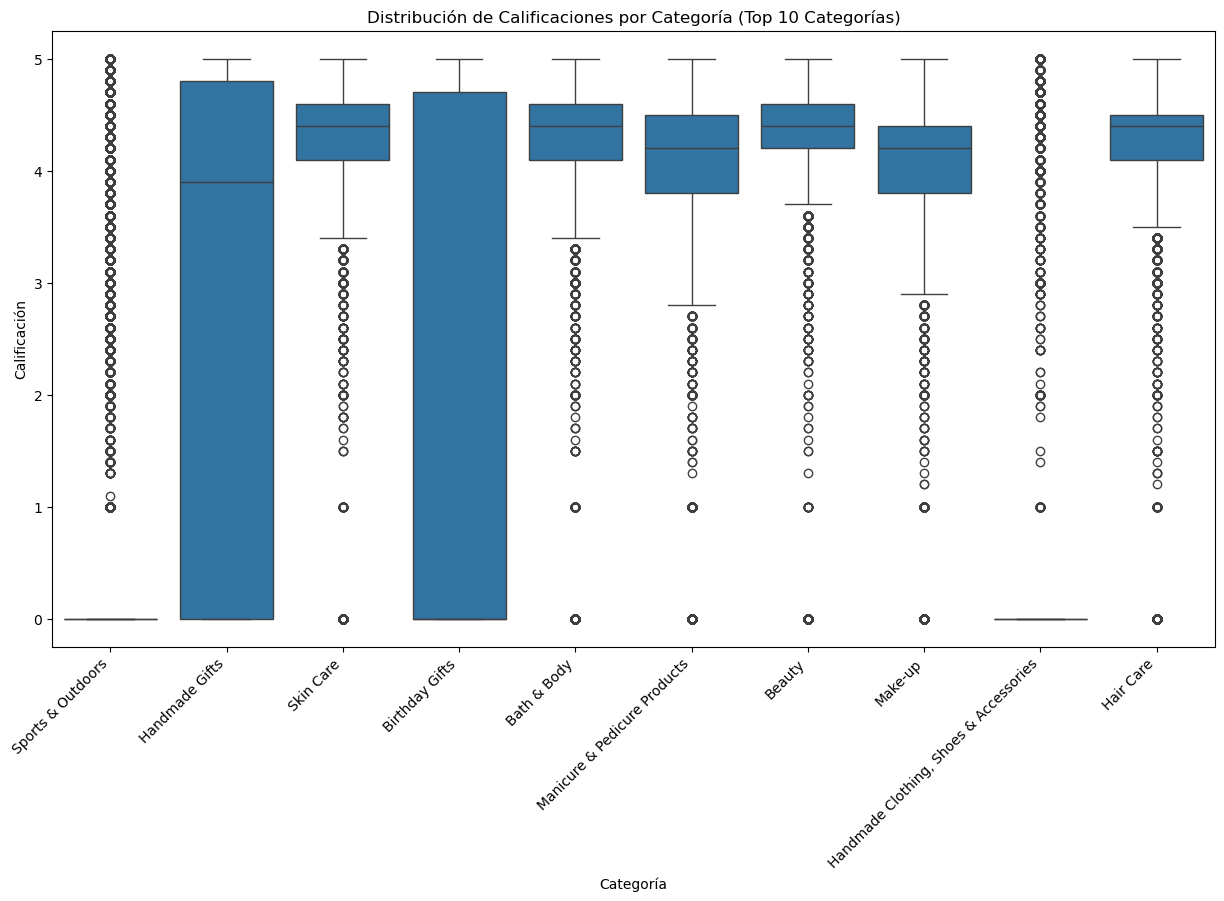

La categoría con la calificación mediana más alta es: Computer Memory con una calificación mediana de 4.70


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las 10 categorías principales según la cantidad de productos
top_10_categories = df_without_outliers['category'].value_counts().head(10).index
df_top_ratings = df_without_outliers[df_without_outliers['category'].isin(top_10_categories)]

# Crear un gráfico de caja para visualizar la distribución de calificaciones
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top_ratings, x='category', y='stars')
plt.title('Distribución de Calificaciones por Categoría (Top 10 Categorías)')
plt.xlabel('Categoría')
plt.ylabel('Calificación')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calcular la categoría con la calificación mediana más alta en todo el conjunto de datos (sin filtrar)
median_ratings = df_without_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
highest_median_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(f"La categoría con la calificación mediana más alta es: {highest_median_category} con una calificación mediana de {highest_median_rating:.2f}")


In [34]:
# Calcular el coeficiente de correlación de Pearson entre 'price' y 'stars'
correlation = df_without_outliers['price'].corr(df_without_outliers['stars'])

print(f"El coeficiente de correlación entre 'price' y 'stars' es: {correlation:.2f}")

# Interpretación básica del coeficiente
if correlation > 0.5:
    print("Hay una correlación positiva moderada a fuerte entre el precio y la calificación del producto.")
elif correlation > 0:
    print("Hay una correlación positiva débil entre el precio y la calificación del producto.")
elif correlation < -0.5:
    print("Hay una correlación negativa moderada a fuerte entre el precio y la calificación del producto.")
elif correlation < 0:
    print("Hay una correlación negativa débil entre el precio y la calificación del producto.")
else:
    print("No hay una correlación significativa entre el precio y la calificación del producto.")


El coeficiente de correlación entre 'price' y 'stars' es: -0.08
Hay una correlación negativa débil entre el precio y la calificación del producto.


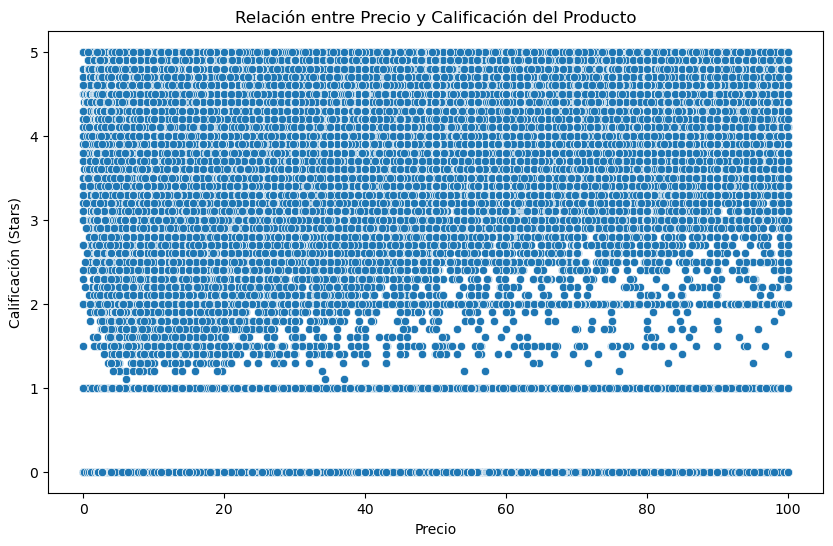

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de dispersión para observar la relación entre 'price' y 'stars'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_without_outliers, x='price', y='stars')
plt.title('Relación entre Precio y Calificación del Producto')
plt.xlabel('Precio')
plt.ylabel('Calificación (Stars)')
plt.show()


# Mapa de Calor de Correlaciones entre las variables numéricas 

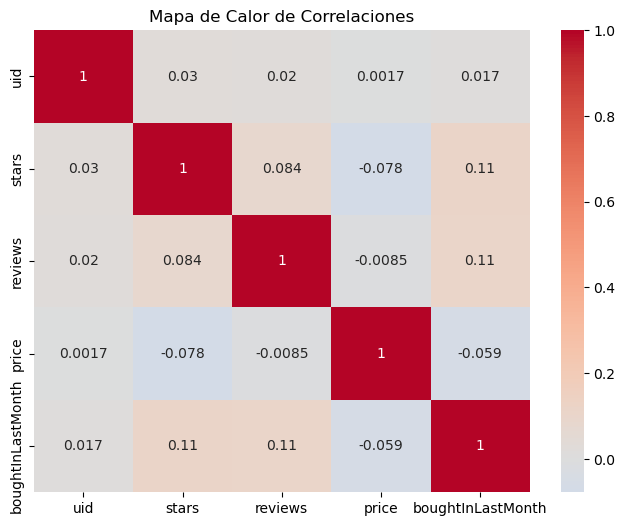

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
numerical_df = df_without_outliers.select_dtypes(include='number')

# Crear un mapa de calor para visualizar las correlaciones entre las variables numéricas
plt.figure(figsize=(8, 6))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


# QQ Plot para Verificar la Normalidad de los Precios

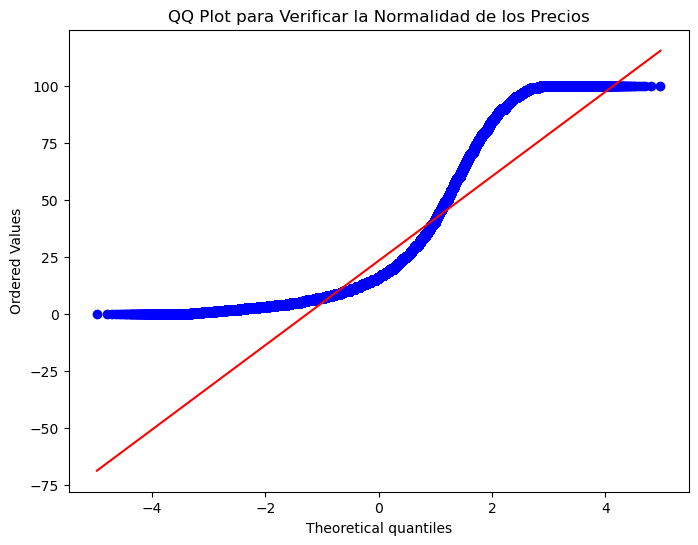

In [47]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# QQ Plot para verificar la normalidad de la distribución de los precios
plt.figure(figsize=(8, 6))
stats.probplot(df_without_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot para Verificar la Normalidad de los Precios')
plt.show()
